In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

: 

In [ ]:
from pynq import Overlay
from pynq import allocate
ol = Overlay("design_16.bit")
dma=ol.axi_dma_0
dma_send = dma.sendchannel
dma_recv = dma.recvchannel

In [3]:
ol?

In [ ]:
N=16; #number of samples in sine wave
t_s=0.01 # sampling time in seconds
f_s=1/t_s # sampling frequency in Hz
f=25 # frequency of sine wave in Hz, (-46,46)
t=np.arange(N)*t_s # time axis
x=np.array(np.sin(2*np.pi*f*t)) # sine wave samples

Text(0, 0.5, 'Amplitude')

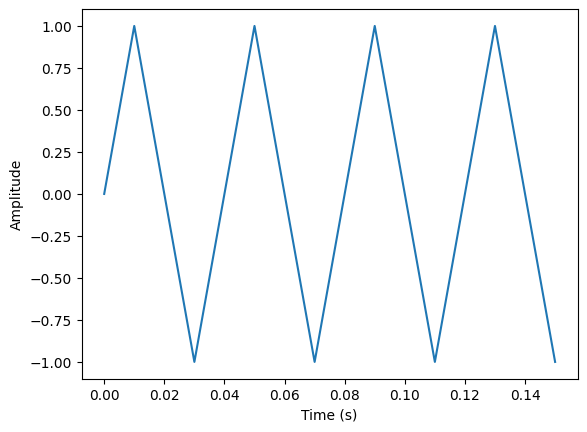

In [4]:
#input plot
plt.plot(t,x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

In [ ]:
ps_start=time.time()
y_sw=np.fft.fft(input_buffer)
ps_stop=time.time()

In [6]:
input_buffer = allocate(shape=(N,), dtype=np.complex64)
output_buffer = allocate(shape=(N,), dtype=np.complex64)
np.copyto(input_buffer,x)

In [7]:
pl_start=time.time()
dma_send.transfer(input_buffer)
dma_recv.transfer(output_buffer)
dma_send.wait()
dma_recv.wait()
pl_stop=time.time()

In [8]:
pl_time=pl_stop-pl_start
pl_time

0.0020859241485595703

In [10]:
ps_time=ps_stop-ps_start
ps_time

0.004752159118652344

In [11]:
AF=ps_time/pl_time
AF

2.2782032232255114

In [ ]:
y_hw=np.zeros((N,),dtype=np.complex64)
np.copyto(y_hw,output_buffer)
rmse=np.sqrt(np.sum(np.square(np.abs(y_sw-y_hw)))/N)
rmse

: 

In [8]:
#PL output plot
plt.plot(np.fft.fftshift(np.fft.fftfreq(N,t_s)),np.fft.fftshift(abs(y_hw)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

NameError: name 'y_hw' is not defined

Text(0, 0.5, 'Amplitude')

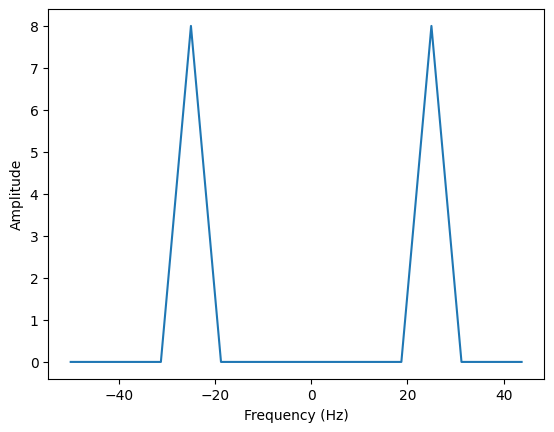

In [7]:
#PS output plot
plt.plot(np.fft.fftshift(np.fft.fftfreq(N,t_s)),np.fft.fftshift(abs(y_sw)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')